In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn.impute import SimpleImputer

2023-03-09 11:19:37.873437: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
def rmse(y_true, y_pred):
    return np.sqrt(np.nanmean((y_true - y_pred)**2))

# Open dict with collocated SAR data

In [3]:
data_dir = "/lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/"

In [4]:
with open(data_dir + 'collocated_dict_5e_4_filtered_cnn.pickle', 'rb') as handle:
        d = pickle.load(handle)

In [5]:
df = pd.concat(d.values(), ignore_index=True)
df

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,grid_lons_110,grid_lons_111,grid_lons_112,grid_lons_113,grid_lons_114,grid_lons_115,grid_lons_116,grid_lons_117,grid_lons_118,grid_lons_119
0,0.131507,0.306354,344.480002,2476.816541,1005.776480,1006.983499,5.750744,5.858569,73.541799,72.235029,...,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0
1,0.169644,0.076862,301.660002,2477.280367,1011.450370,1012.675998,5.016032,5.128066,77.170098,76.182660,...,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0
2,0.025622,-0.383063,274.325002,2476.904365,1020.987403,1022.212997,4.964464,5.199127,66.090098,63.038793,...,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0
3,-0.202953,-0.490062,309.255003,2476.669098,1013.606853,1014.807996,4.241058,4.533348,44.618498,40.755557,...,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0
4,-0.026441,-0.730744,320.615001,2475.218603,1018.266915,1019.488495,7.084940,7.120605,91.120398,91.004979,...,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,0.078067,-0.018678,257.135000,2491.579194,994.525701,995.769507,2.913308,2.980954,77.774753,76.929502,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0
767,0.078067,-0.018678,238.530001,2491.798855,999.285638,1000.545505,2.513606,2.630492,80.575903,79.902359,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0
768,0.078067,-0.018678,266.660001,2491.502372,1002.762277,1004.015002,2.848601,2.917305,75.022252,74.087723,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0
769,0.078067,-0.018678,307.060001,2491.494117,963.167535,964.349008,5.345668,5.334279,94.738453,94.818847,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0


In [6]:
df = df.dropna(subset=['UWr', 'rhoair'])
df

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,grid_lons_110,grid_lons_111,grid_lons_112,grid_lons_113,grid_lons_114,grid_lons_115,grid_lons_116,grid_lons_117,grid_lons_118,grid_lons_119
0,0.131507,0.306354,344.480002,2476.816541,1005.776480,1006.983499,5.750744,5.858569,73.541799,72.235029,...,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0
1,0.169644,0.076862,301.660002,2477.280367,1011.450370,1012.675998,5.016032,5.128066,77.170098,76.182660,...,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0
2,0.025622,-0.383063,274.325002,2476.904365,1020.987403,1022.212997,4.964464,5.199127,66.090098,63.038793,...,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0
3,-0.202953,-0.490062,309.255003,2476.669098,1013.606853,1014.807996,4.241058,4.533348,44.618498,40.755557,...,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0
4,-0.026441,-0.730744,320.615001,2475.218603,1018.266915,1019.488495,7.084940,7.120605,91.120398,91.004979,...,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,0.078067,-0.018678,257.135000,2491.579194,994.525701,995.769507,2.913308,2.980954,77.774753,76.929502,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0
767,0.078067,-0.018678,238.530001,2491.798855,999.285638,1000.545505,2.513606,2.630492,80.575903,79.902359,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0
768,0.078067,-0.018678,266.660001,2491.502372,1002.762277,1004.015002,2.848601,2.917305,75.022252,74.087723,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0
769,0.078067,-0.018678,307.060001,2491.494117,963.167535,964.349008,5.345668,5.334279,94.738453,94.818847,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0


In [7]:
df = df.sample(frac = 1, random_state=77)
df     

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,grid_lons_110,grid_lons_111,grid_lons_112,grid_lons_113,grid_lons_114,grid_lons_115,grid_lons_116,grid_lons_117,grid_lons_118,grid_lons_119
384,-0.012150,-0.032903,329.650000,2484.919633,981.833176,983.035999,4.801381,4.852067,85.199704,84.816429,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0
703,0.078067,-0.018678,328.049998,2485.081475,1018.852822,1020.094492,5.769578,5.773733,96.045652,96.170476,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0
547,-0.012150,-0.032903,262.404997,2490.861123,1017.304386,1018.553506,4.284894,4.316867,81.548054,80.939972,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0
343,-0.012150,-0.032903,344.449998,2477.154018,993.498046,994.705493,5.478307,5.527708,84.861454,84.644287,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0
155,0.009946,-0.040725,332.674997,2482.830957,1005.523308,1006.754001,5.121342,5.164710,91.495950,91.405455,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,0.064698,0.066662,382.090001,2446.286109,1019.939140,1021.138998,9.228230,9.585403,88.167400,87.101354,...,-70.0,-70.0,-70.0,-70.0,-70.0,-70.0,-70.0,-70.0,-70.0,-70.0
235,0.009946,-0.040725,304.839998,2490.234728,1014.029920,1015.279489,4.760158,4.772068,96.832301,97.017771,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0
596,-0.012150,-0.032903,307.009996,2481.803889,999.423692,1000.634009,6.482827,6.486903,94.549654,94.577806,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0
607,-0.012150,-0.032903,351.980002,2478.168359,1019.863824,1021.104507,6.098199,6.111122,98.692553,98.937198,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0


In [8]:
df = df.replace(-9.223372036854776e+18, 9999)

In [9]:
c = df['stress']
y = - df['UWr'] * df['rhoair']

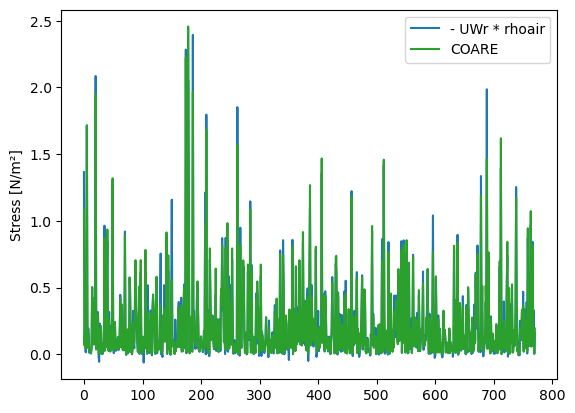

In [10]:
plt.plot(y.values, label='- UWr * rhoair')
plt.plot(c.values, label='COARE', color='C2')
plt.ylabel('Stress [N/m²]')       
plt.legend()

In [11]:
split_idx = 560

# S0, inc, az

# Prepare features and labels

In [12]:
list_num_pixels = list(range(120))
s0_str = ['s0_' + str(n) for n in list_num_pixels]
inc_str = ['inc_' + str(n) for n in list_num_pixels]
az_str = ['az_' + str(n) for n in list_num_pixels]
#grid_lats_str = ['grid_lats_' + str(n) for n in list_num_pixels]
#grid_lons_str = ['grid_lons_' + str(n) for n in list_num_pixels]

predictor_variables = s0_str + inc_str + az_str #+ grid_lats_str + grid_lons_str

predictor_variables = ['s0', 'inc', 'az']

In [13]:
df[predictor_variables]

,s0_0,s0_1,s0_2,s0_3,s0_4,s0_5,s0_6,s0_7,s0_8,s0_9,...,az_110,az_111,az_112,az_113,az_114,az_115,az_116,az_117,az_118,az_119
384,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0
703,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0
547,-11.0,-10.0,-14.0,-11.0,-12.0,-12.0,9999.0,9999.0,9999.0,9999.0,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0
343,-17.0,-18.0,-15.0,-18.0,-15.0,-15.0,9999.0,9999.0,9999.0,9999.0,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0
155,-17.0,-16.0,-17.0,-16.0,-19.0,-16.0,9999.0,9999.0,9999.0,9999.0,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,-8.0,-11.0,-11.0,-9.0,-9.0,-9.0,-11.0,-14.0,-13.0,-12.0,...,280.0,280.0,280.0,280.0,280.0,280.0,280.0,280.0,280.0,280.0
235,-8.0,-6.0,-8.0,-7.0,-8.0,-7.0,9999.0,9999.0,9999.0,9999.0,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0
596,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0
607,-24.0,-24.0,-26.0,-24.0,-23.0,-23.0,-24.0,-23.0,-20.0,-21.0,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0


In [14]:
imp_mean = SimpleImputer(missing_values=9999, strategy='most_frequent')

In [15]:
x = imp_mean.fit_transform(df[predictor_variables])
x

array([[-15., -14., -14., ..., 280., 280., 280.],
       [-15., -14., -14., ..., 280., 280., 280.],
       [-11., -10., -14., ..., 280., 280., 280.],
       ...,
       [-15., -14., -14., ..., 280., 280., 280.],
       [-24., -24., -26., ..., 280., 280., 280.],
       [ -5.,  -4.,  -8., ..., 280., 280., 280.]])

In [16]:
x[0, 0]

-15.0

In [17]:
imp_mean = SimpleImputer(missing_values=-9.22337204e+18, strategy='constant')

In [18]:
x = imp_mean.fit_transform(x)
x

array([[-15., -14., -14., ..., 280., 280., 280.],
       [-15., -14., -14., ..., 280., 280., 280.],
       [-11., -10., -14., ..., 280., 280., 280.],
       ...,
       [-15., -14., -14., ..., 280., 280., 280.],
       [-24., -24., -26., ..., 280., 280., 280.],
       [ -5.,  -4.,  -8., ..., 280., 280., 280.]])

x = df[predictor_variables]
x

In [19]:
x.shape

(771, 360)

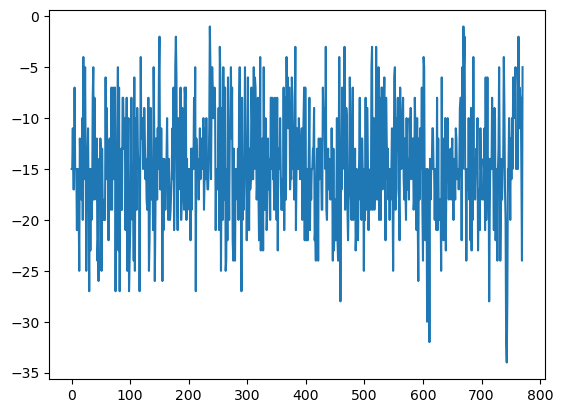

In [20]:
plt.plot(x[:, 0])

In [21]:
y = - df['UWr'] * df['rhoair']
y

384    1.364905
703    0.085199
547    0.171147
343    0.014584
155    0.153417
         ...   
293    0.842862
235    0.060775
596    0.330475
607    0.004852
727    0.157836
Length: 771, dtype: float64

In [22]:
y.isnull().values.sum()

0

# COARE

In [23]:
c = df['stress']

In [24]:
x_train = x[:split_idx]
x_test = x[split_idx:]

In [25]:
y_train = y[:split_idx]
y_test = y[split_idx:]

In [26]:
c_train = c[:split_idx]
c_test = c[split_idx:]

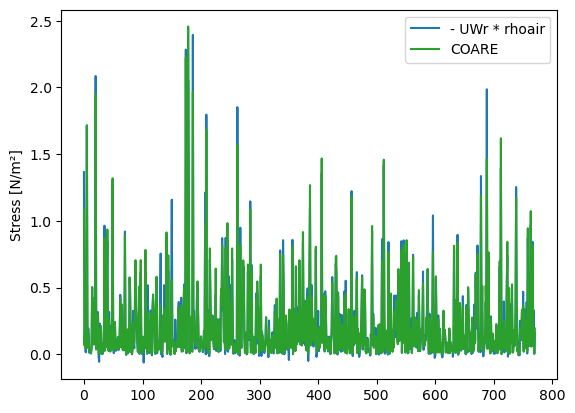

In [27]:

plt.plot(y.values, label='- UWr * rhoair')
plt.plot(c.values, label='COARE', color='C2')
plt.ylabel('Stress [N/m²]')       
plt.legend()

# PCA

In [31]:
x_train.shape


(560, 360)

In [32]:
# apply PCA once to
# select the best number of components
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=x_train.shape[1])
pca.fit(x_train)

PCA(n_components=360)

Text(0, 0.5, 'Explained variance')

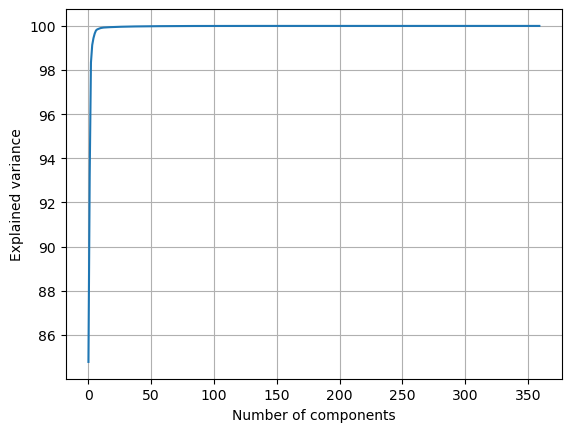

In [33]:
plt.grid()
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

Text(0, 0.5, 'Explained variance')

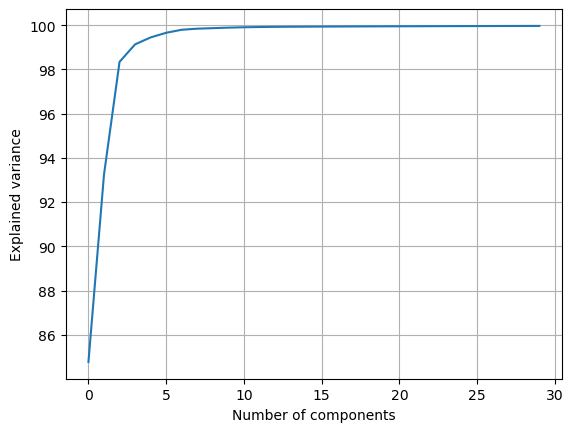

In [35]:
plt.grid()
plt.plot(np.cumsum(pca.explained_variance_ratio_[0:30] * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

In [38]:
# apply PCA again with 10 components
# transformation is applied to both
# train and test sets
pca_10 = PCA(n_components=10)
pca_10.fit(x_train)
train_images_reduced = pca_10.transform(x_train)
test_images_reduced = pca_10.transform(x_test)

# verify shape after PCA
print("Train images shape:", train_images_reduced.shape)
print("Test images shape: ", test_images_reduced.shape)

# get exact variability retained
print("\nVar retained (%):", 
      np.sum(pca_10.explained_variance_ratio_ * 100))

Train images shape: (560, 10)
Test images shape:  (211, 10)

Var retained (%): 99.8890660573713


In [39]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [40]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

# First experiment - Linear regression

In [41]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    train_images_reduced,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
13/13 [==============================] - 0s 8ms/step - loss: 48961.7327 - mean_absolute_error: 145.3248 - val_loss: 53982.8398 - val_mean_absolute_error: 157.6424
Epoch 2/500
13/13 [==============================] - 0s 2ms/step - loss: 37229.1503 - mean_absolute_error: 128.9681 - val_loss: 50872.0352 - val_mean_absolute_error: 152.7563
Epoch 3/500
13/13 [==============================] - 0s 2ms/step - loss: 37260.2174 - mean_absolute_error: 122.0084 - val_loss: 47672.0547 - val_mean_absolute_error: 147.6536
Epoch 4/500
13/13 [==============================] - 0s 2ms/step - loss: 38098.4213 - mean_absolute_error: 128.6059 - val_loss: 44708.5000 - val_mean_absolute_error: 142.6854
Epoch 5/500
13/13 [==============================] - 0s 3ms/step - loss: 34762.6977 - mean_absolute_error: 123.9335 - val_loss: 41972.5938 - val_mean_absolute_error: 137.9504
Epoch 6/500
13/13 [==============================] - 0s 2ms/step - loss: 35189.2157 - mean_absolute_error: 123.5824 - val_los

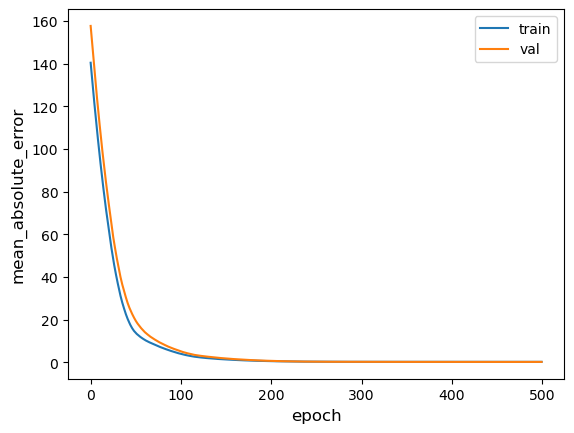

7/7 [==============================] - 0s 641us/step - loss: 0.0599 - mean_absolute_error: 0.1655
Test accuracy 0.16552169620990753
Test loss 0.05988669395446777


In [48]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(test_images_reduced, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [50]:
y_test_pred = multi_dense_model.predict(test_images_reduced)

In [51]:
np.mean(y_test)

0.19755932327375753

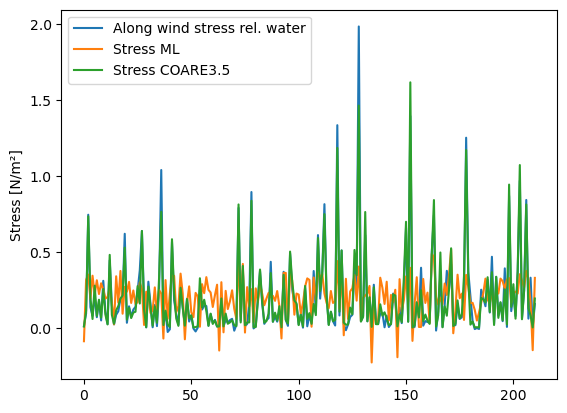

In [52]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [53]:
rmse(y_test.values, y_test_pred)

0.30566185768428644

In [54]:
rmse(y_test.values, c_test)

0.06989463144562381

# Other experimentstest_images_reduced

In [55]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [56]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [57]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    train_images_reduced,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
25/25 [==============================] - 1s 5ms/step - loss: 2.4602 - mean_absolute_error: 1.1309 - val_loss: 5.0797 - val_mean_absolute_error: 1.7513
Epoch 2/500
25/25 [==============================] - 0s 2ms/step - loss: 0.9056 - mean_absolute_error: 0.7046 - val_loss: 0.8798 - val_mean_absolute_error: 0.7524
Epoch 3/500
25/25 [==============================] - 0s 2ms/step - loss: 0.3721 - mean_absolute_error: 0.4641 - val_loss: 0.3842 - val_mean_absolute_error: 0.5053
Epoch 4/500
25/25 [==============================] - 0s 2ms/step - loss: 0.2884 - mean_absolute_error: 0.4259 - val_loss: 0.2294 - val_mean_absolute_error: 0.3871
Epoch 5/500
25/25 [==============================] - 0s 2ms/step - loss: 0.2719 - mean_absolute_error: 0.3966 - val_loss: 0.1672 - val_mean_absolute_error: 0.3202
Epoch 6/500
25/25 [==============================] - 0s 2ms/step - loss: 0.2561 - mean_absolute_error: 0.3760 - val_loss: 0.1351 - val_mean_absolute_error: 0.2847
Epoch 7/500
25/25 [===

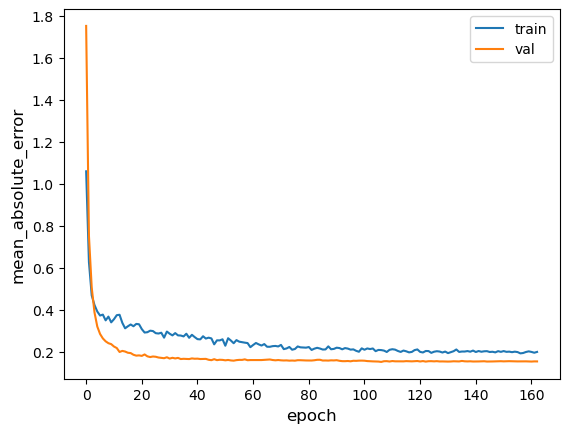

7/7 [==============================] - 0s 619us/step - loss: 0.0569 - mean_absolute_error: 0.1679
Test accuracy 0.1679484099149704
Test loss 0.056911271065473557


In [58]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(test_images_reduced, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [59]:
y_test_pred = multi_dense_model.predict(test_images_reduced)

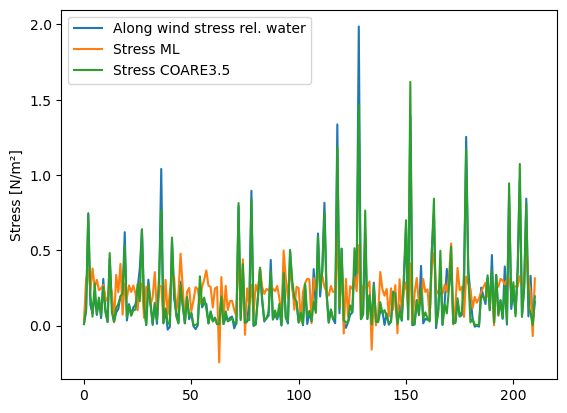

In [60]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [61]:
rmse(y_test.values, y_test_pred)

0.30475670810725297

In [62]:
rmse(y_test.values, c_test.values)

0.06989463144562381

In [63]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.52812434],
       [0.52812434, 1.        ]])

In [64]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.96802152],
       [0.96802152, 1.        ]])

In [65]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [66]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [67]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    train_images_reduced,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
25/25 [==============================] - 1s 6ms/step - loss: 1.2552 - mean_absolute_error: 0.8657 - val_loss: 6.7796 - val_mean_absolute_error: 2.1905
Epoch 2/500
25/25 [==============================] - 0s 2ms/step - loss: 0.7140 - mean_absolute_error: 0.6483 - val_loss: 2.1970 - val_mean_absolute_error: 1.1706
Epoch 3/500
25/25 [==============================] - 0s 2ms/step - loss: 0.4150 - mean_absolute_error: 0.4718 - val_loss: 1.0168 - val_mean_absolute_error: 0.7866
Epoch 4/500
25/25 [==============================] - 0s 2ms/step - loss: 0.3284 - mean_absolute_error: 0.4297 - val_loss: 0.5112 - val_mean_absolute_error: 0.5611
Epoch 5/500
25/25 [==============================] - 0s 2ms/step - loss: 0.2743 - mean_absolute_error: 0.3821 - val_loss: 0.2979 - val_mean_absolute_error: 0.4264
Epoch 6/500
25/25 [==============================] - 0s 2ms/step - loss: 0.3033 - mean_absolute_error: 0.3768 - val_loss: 0.2037 - val_mean_absolute_error: 0.3501
Epoch 7/500
25/25 [===

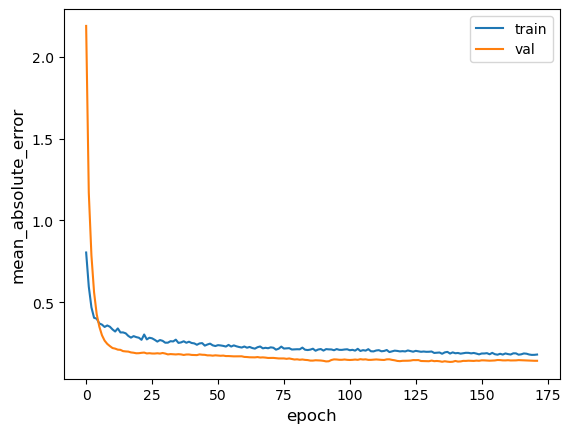

7/7 [==============================] - 0s 636us/step - loss: 0.0589 - mean_absolute_error: 0.1554
Test accuracy 0.15540754795074463
Test loss 0.058897458016872406


In [68]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(test_images_reduced, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [69]:
y_test_pred = multi_dense_model.predict(test_images_reduced)

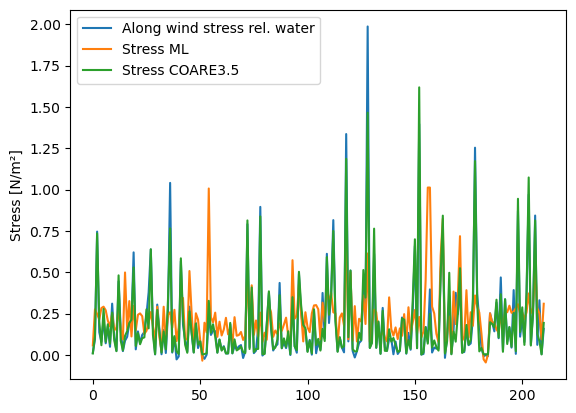

In [70]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [71]:
rmse(y_test.values, y_test_pred)

0.32257036836440206

In [72]:
rmse(y_test.values, c_test.values)

0.06989463144562381

In [73]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.50293295],
       [0.50293295, 1.        ]])

In [74]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.96802152],
       [0.96802152, 1.        ]])

In [75]:
OUT_STEPS = 1
num_features = 1
batch_size =256
epochs=500

metric = 'mean_absolute_error'

In [76]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [77]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.1),
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    train_images_reduced,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
2/2 [==============================] - 1s 130ms/step - loss: 1.7412 - mean_absolute_error: 1.0326 - val_loss: 45.9196 - val_mean_absolute_error: 5.5143
Epoch 2/500
2/2 [==============================] - 0s 26ms/step - loss: 1.0935 - mean_absolute_error: 0.7799 - val_loss: 30.4647 - val_mean_absolute_error: 4.7926
Epoch 3/500
2/2 [==============================] - 0s 25ms/step - loss: 0.7178 - mean_absolute_error: 0.6716 - val_loss: 25.4622 - val_mean_absolute_error: 4.0999
Epoch 4/500
2/2 [==============================] - 0s 25ms/step - loss: 0.6080 - mean_absolute_error: 0.5953 - val_loss: 22.5769 - val_mean_absolute_error: 3.4686
Epoch 5/500
2/2 [==============================] - 0s 25ms/step - loss: 0.4975 - mean_absolute_error: 0.4963 - val_loss: 19.9789 - val_mean_absolute_error: 3.1074
Epoch 6/500
2/2 [==============================] - 0s 25ms/step - loss: 0.4200 - mean_absolute_error: 0.4767 - val_loss: 16.4028 - val_mean_absolute_error: 2.9114
Epoch 7/500
2/2 [====

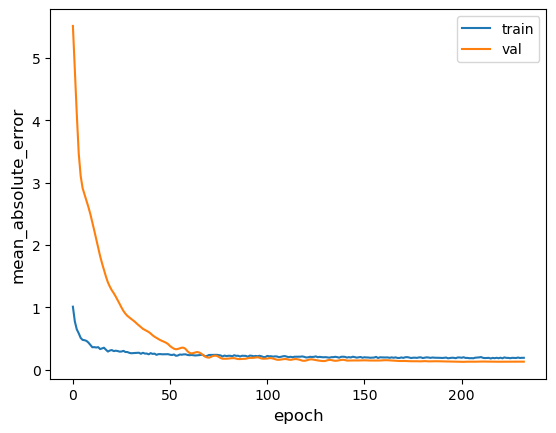

7/7 [==============================] - 0s 856us/step - loss: 0.0527 - mean_absolute_error: 0.1449
Test accuracy 0.1448584496974945
Test loss 0.05265144631266594


In [78]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(test_images_reduced, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [79]:
y_test_pred = multi_dense_model.predict(test_images_reduced)

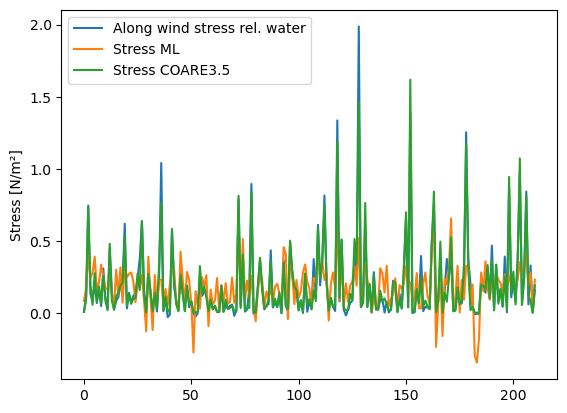

In [80]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [81]:
rmse(y_test.values, y_test_pred)

0.3167836401273789

In [82]:
rmse(y_test.values, c_test.values)

0.06989463144562381

In [83]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.56401559],
       [0.56401559, 1.        ]])

In [84]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.96802152],
       [0.96802152, 1.        ]])

# PCA

In [85]:
# apply PCA once to
# select the best number of components
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=x_train.shape[1])
pca.fit(x_train)

PCA(n_components=360)

Text(0, 0.5, 'Explained variance')

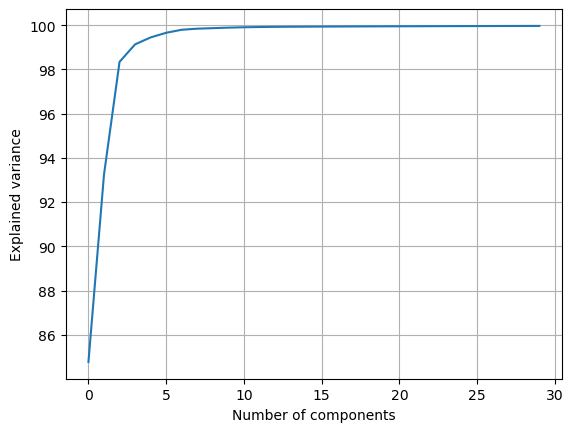

In [87]:
plt.grid()
plt.plot(np.cumsum(pca.explained_variance_ratio_[0:30] * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

In [88]:
# apply PCA again with 10 components
# transformation is applied to both
# train and test sets
pca_5 = PCA(n_components=5)
pca_5.fit(x_train)
train_images_reduced = pca_5.transform(x_train)
test_images_reduced = pca_5.transform(x_test)

# verify shape after PCA
print("Train images shape:", train_images_reduced.shape)
print("Test images shape: ", test_images_reduced.shape)

# get exact variability retained
print("\nVar retained (%):", 
      np.sum(pca_5.explained_variance_ratio_ * 100))

Train images shape: (560, 5)
Test images shape:  (211, 5)

Var retained (%): 99.44793261248472


In [89]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [90]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

# First experiment - Linear regression

In [91]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    train_images_reduced,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
13/13 [==============================] - 0s 8ms/step - loss: 89978.7902 - mean_absolute_error: 210.7520 - val_loss: 83820.3359 - val_mean_absolute_error: 195.1638
Epoch 2/500
13/13 [==============================] - 0s 2ms/step - loss: 77656.1607 - mean_absolute_error: 194.9171 - val_loss: 80182.3984 - val_mean_absolute_error: 190.7561
Epoch 3/500
13/13 [==============================] - 0s 3ms/step - loss: 68706.3627 - mean_absolute_error: 184.2817 - val_loss: 76689.0547 - val_mean_absolute_error: 186.4329
Epoch 4/500
13/13 [==============================] - 0s 3ms/step - loss: 74672.6590 - mean_absolute_error: 193.7327 - val_loss: 73043.9141 - val_mean_absolute_error: 181.8401
Epoch 5/500
13/13 [==============================] - 0s 3ms/step - loss: 69754.0592 - mean_absolute_error: 184.3934 - val_loss: 69616.7344 - val_mean_absolute_error: 177.4082
Epoch 6/500
13/13 [==============================] - 0s 3ms/step - loss: 65617.3909 - mean_absolute_error: 183.6157 - val_los

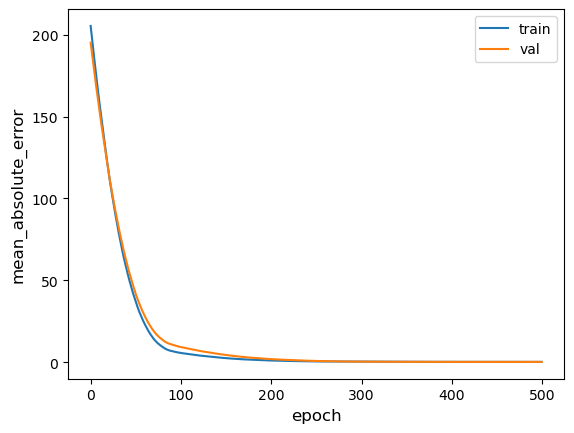

7/7 [==============================] - 0s 522us/step - loss: 0.0720 - mean_absolute_error: 0.1650
Test accuracy 0.1649564951658249
Test loss 0.0719512403011322


In [92]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(test_images_reduced, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [93]:
y_test_pred = multi_dense_model.predict(test_images_reduced)

In [94]:
np.mean(y_test)

0.19755932327375753

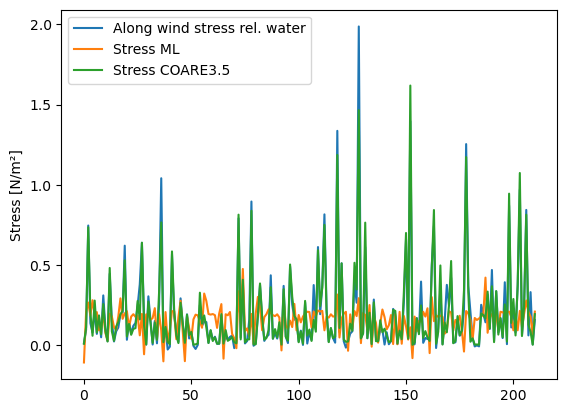

In [95]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [96]:
rmse(y_test.values, y_test_pred)

0.2942138980179995

In [97]:
rmse(y_test.values, c_test)

0.06989463144562381

# Other experimentstest_images_reduced

In [98]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [99]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [100]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    train_images_reduced,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
25/25 [==============================] - 0s 5ms/step - loss: 0.6300 - mean_absolute_error: 0.6017 - val_loss: 4.0203 - val_mean_absolute_error: 1.8332
Epoch 2/500
25/25 [==============================] - 0s 2ms/step - loss: 0.4344 - mean_absolute_error: 0.4484 - val_loss: 1.5841 - val_mean_absolute_error: 1.1399
Epoch 3/500
25/25 [==============================] - 0s 2ms/step - loss: 0.4075 - mean_absolute_error: 0.4497 - val_loss: 0.8656 - val_mean_absolute_error: 0.8391
Epoch 4/500
25/25 [==============================] - 0s 2ms/step - loss: 0.4322 - mean_absolute_error: 0.4324 - val_loss: 0.4873 - val_mean_absolute_error: 0.6208
Epoch 5/500
25/25 [==============================] - 0s 2ms/step - loss: 0.3611 - mean_absolute_error: 0.4020 - val_loss: 0.3335 - val_mean_absolute_error: 0.5072
Epoch 6/500
25/25 [==============================] - 0s 2ms/step - loss: 0.2861 - mean_absolute_error: 0.3545 - val_loss: 0.2581 - val_mean_absolute_error: 0.4463
Epoch 7/500
25/25 [===

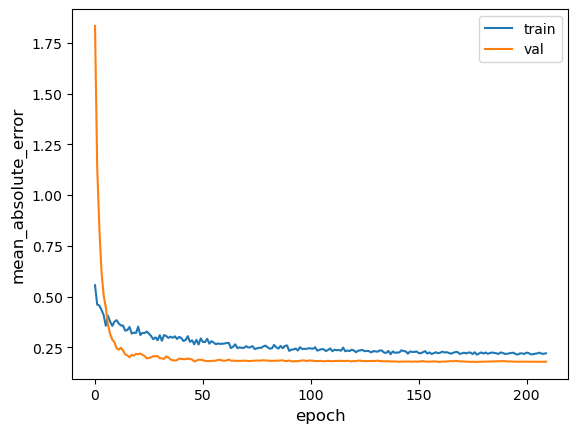

7/7 [==============================] - 0s 638us/step - loss: 0.0703 - mean_absolute_error: 0.1846
Test accuracy 0.18464858829975128
Test loss 0.07029996812343597


In [101]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(test_images_reduced, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [102]:
y_test_pred = multi_dense_model.predict(test_images_reduced)

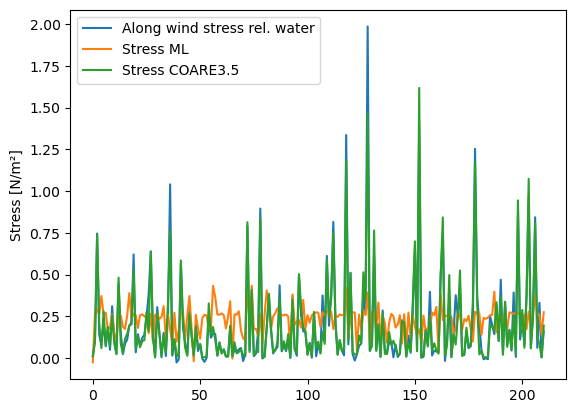

In [103]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [104]:
rmse(y_test.values, y_test_pred)

0.2905600551607956

In [105]:
rmse(y_test.values, c_test.values)

0.06989463144562381

In [106]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.31698332],
       [0.31698332, 1.        ]])

In [107]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.96802152],
       [0.96802152, 1.        ]])

In [108]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [109]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [110]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    train_images_reduced,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
25/25 [==============================] - 1s 6ms/step - loss: 1.5881 - mean_absolute_error: 1.0002 - val_loss: 2.2278 - val_mean_absolute_error: 1.2968
Epoch 2/500
25/25 [==============================] - 0s 2ms/step - loss: 0.8760 - mean_absolute_error: 0.7381 - val_loss: 0.8866 - val_mean_absolute_error: 0.8058
Epoch 3/500
25/25 [==============================] - 0s 2ms/step - loss: 0.7409 - mean_absolute_error: 0.6670 - val_loss: 0.4804 - val_mean_absolute_error: 0.6074
Epoch 4/500
25/25 [==============================] - 0s 2ms/step - loss: 0.6191 - mean_absolute_error: 0.6008 - val_loss: 0.3874 - val_mean_absolute_error: 0.5466
Epoch 5/500
25/25 [==============================] - 0s 2ms/step - loss: 0.4809 - mean_absolute_error: 0.5446 - val_loss: 0.2817 - val_mean_absolute_error: 0.4476
Epoch 6/500
25/25 [==============================] - 0s 2ms/step - loss: 0.4336 - mean_absolute_error: 0.4856 - val_loss: 0.1952 - val_mean_absolute_error: 0.3432
Epoch 7/500
25/25 [===

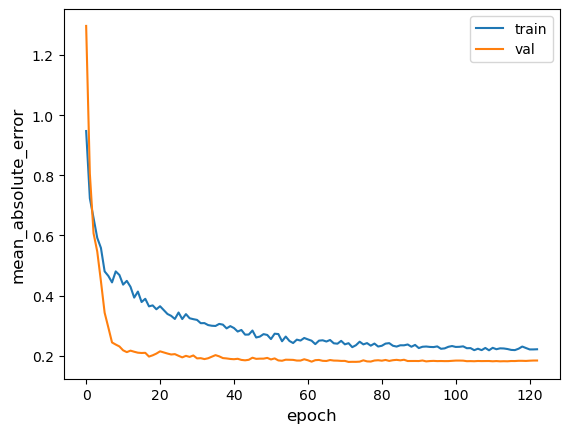

7/7 [==============================] - 0s 545us/step - loss: 0.0727 - mean_absolute_error: 0.1922
Test accuracy 0.19216835498809814
Test loss 0.07268942147493362


In [111]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(test_images_reduced, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [112]:
y_test_pred = multi_dense_model.predict(test_images_reduced)

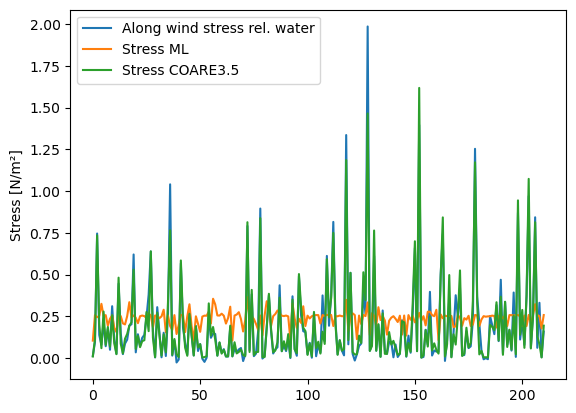

In [113]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [114]:
rmse(y_test.values, y_test_pred)

0.283944309261671

In [115]:
rmse(y_test.values, c_test.values)

0.06989463144562381

In [116]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.31049109],
       [0.31049109, 1.        ]])

In [117]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.96802152],
       [0.96802152, 1.        ]])

In [118]:
OUT_STEPS = 1
num_features = 1
batch_size =256
epochs=500

metric = 'mean_absolute_error'

In [119]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [120]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.1),
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    train_images_reduced,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
2/2 [==============================] - 1s 122ms/step - loss: 2.7137 - mean_absolute_error: 1.3482 - val_loss: 61.6817 - val_mean_absolute_error: 6.7049
Epoch 2/500
2/2 [==============================] - 0s 27ms/step - loss: 1.7876 - mean_absolute_error: 1.0660 - val_loss: 32.3087 - val_mean_absolute_error: 5.1275
Epoch 3/500
2/2 [==============================] - 0s 25ms/step - loss: 0.8407 - mean_absolute_error: 0.7030 - val_loss: 21.0367 - val_mean_absolute_error: 4.0966
Epoch 4/500
2/2 [==============================] - 0s 25ms/step - loss: 0.8823 - mean_absolute_error: 0.7045 - val_loss: 14.9999 - val_mean_absolute_error: 3.3996
Epoch 5/500
2/2 [==============================] - 0s 24ms/step - loss: 0.5934 - mean_absolute_error: 0.5631 - val_loss: 10.7160 - val_mean_absolute_error: 2.7545
Epoch 6/500
2/2 [==============================] - 0s 25ms/step - loss: 0.4825 - mean_absolute_error: 0.5248 - val_loss: 8.0440 - val_mean_absolute_error: 2.3668
Epoch 7/500
2/2 [=====

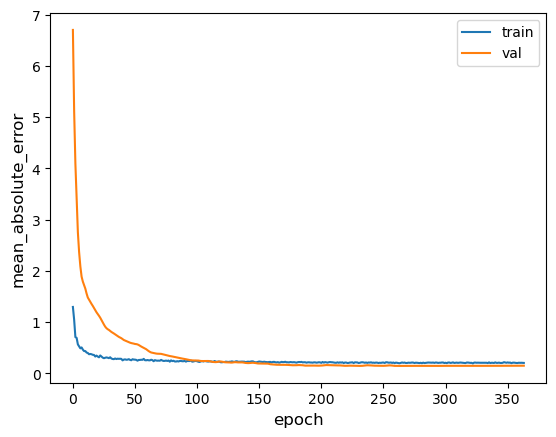

7/7 [==============================] - 0s 806us/step - loss: 0.0599 - mean_absolute_error: 0.1673
Test accuracy 0.16729608178138733
Test loss 0.059904735535383224


In [121]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(test_images_reduced, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [122]:
y_test_pred = multi_dense_model.predict(test_images_reduced)

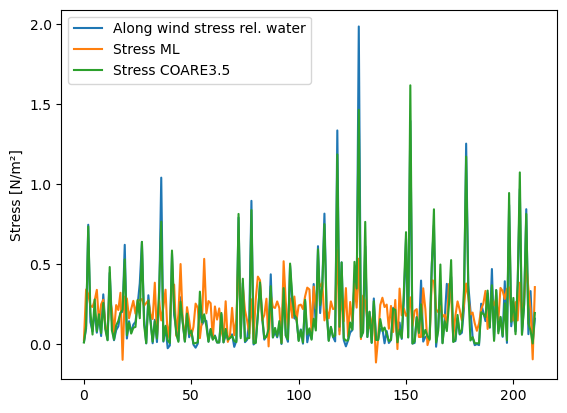

In [123]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [124]:
rmse(y_test.values, y_test_pred)

0.30402172783834025

In [125]:
rmse(y_test.values, c_test.values)

0.06989463144562381

In [126]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.47743747],
       [0.47743747, 1.        ]])

In [127]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.96802152],
       [0.96802152, 1.        ]])